In [1]:
import pandas as pd
import numpy as np

train = pd.read_excel("student_helthcare_dataset_train.xlsx")
test = pd.read_excel("student_helthcare_dataset_test.xlsx")

train.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
1,Chad Byrd,61,Male,B-,NaN,2019-01-09,Paul Baker,Walton LLC,Medicare,0.000000,292,Emergency,2019-02-08,Lipitor,Normal
2,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,-480,Urgent,2020-05-03,Penicillin,Abnormal
3,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,-18086.344184,477,Urgent,2021-08-02,NaN,Normal
4,Patrick Parker,41,Male,AB+,Arthritis,2020-08-20,Robin Green,Boyd PLC,Aetna,22522.363385,180,Urgent,2020-08-23,Aspirin,Abnormal


In [2]:
columns = train.columns
columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')

In [3]:
train["Doctor"].value_counts()

Doctor
James Williams       4
James Perez          4
Michael Smith        4
Christopher Davis    4
Robert Brown         3
                    ..
Angela Evans DDS     1
Juan Reyes           1
Gregory Delgado      1
Mary Banks MD        1
Dean Dalton          1
Name: count, Length: 5825, dtype: int64

In [4]:
train["Hospital"].value_counts()

Hospital
Smith and Sons                12
Smith PLC                     11
Smith Inc                     10
Johnson PLC                    9
Johnson Group                  8
                              ..
Clayton, Anderson and Ho       1
Ford, Vincent and Robinson     1
Harris-Rivera                  1
Aguilar, Hubbard and Glenn     1
Cooper and Sons                1
Name: count, Length: 5425, dtype: int64

In [5]:
train["Medical Condition"].value_counts()

Medical Condition
Cancer          1048
Asthma          1043
Hypertension    1022
Obesity          982
Arthritis        975
Diabetes         971
Name: count, dtype: int64

In [6]:
train["Insurance Provider"].value_counts()

Insurance Provider
Cigna               1266
Aetna               1241
Blue Cross          1225
Medicare            1160
UnitedHealthcare    1158
Name: count, dtype: int64

In [7]:
train["Medication"].value_counts()

Medication
Penicillin     1258
Ibuprofen      1210
Aspirin        1195
Lipitor        1192
Paracetamol    1187
Name: count, dtype: int64

In [8]:
train["Blood Type"].value_counts()

Blood Type
A-     776
O-     769
B-     767
AB-    764
A+     761
AB+    751
O+     738
B+     724
Name: count, dtype: int64

In [9]:
columns = train.columns

for column in columns:
    num_of_unique_values = len(train[column].unique())
    print(f"Number of unique values in {column}: ",num_of_unique_values)

Number of unique values in Name:  5798
Number of unique values in Age:  68
Number of unique values in Gender:  2
Number of unique values in Blood Type:  8
Number of unique values in Medical Condition:  7
Number of unique values in Date of Admission:  1756
Number of unique values in Doctor:  5825
Number of unique values in Hospital:  5425
Number of unique values in Insurance Provider:  5
Number of unique values in Billing Amount:  6044
Number of unique values in Room Number:  405
Number of unique values in Admission Type:  3
Number of unique values in Discharge Date:  1768
Number of unique values in Medication:  6
Number of unique values in Test Results:  2


In [10]:
train.describe()

,Age,Billing Amount,Room Number
count,6050.000000,6.050000e+03,6050.000000
mean,51.429752,2.158714e+04,300.270744
std,19.553034,2.940994e+05,118.031170
min,18.000000,-2.282298e+07,-492.000000
25%,35.000000,1.317240e+04,198.000000
50%,52.000000,2.507342e+04,300.500000
75%,68.000000,3.771203e+04,402.000000
max,85.000000,1.426107e+05,500.000000


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6050 entries, 0 to 6049
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                6050 non-null   object 
 1   Age                 6050 non-null   int64  
 2   Gender              6050 non-null   object 
 3   Blood Type          6050 non-null   object 
 4   Medical Condition   6041 non-null   object 
 5   Date of Admission   6050 non-null   object 
 6   Doctor              6050 non-null   object 
 7   Hospital            6050 non-null   object 
 8   Insurance Provider  6050 non-null   object 
 9   Billing Amount      6050 non-null   float64
 10  Room Number         6050 non-null   int64  
 11  Admission Type      6050 non-null   object 
 12  Discharge Date      6050 non-null   object 
 13  Medication          6042 non-null   object 
 14  Test Results        6050 non-null   object 
dtypes: float64(1), int64(2), object(12)
memory usage: 709.1

## Names of patients, and their rooms wouldn't be helpful to our model
## Hospital, and Doctor would be useful but they contain too many unique values, which is hard to encode

In [12]:
train.drop(["Name", "Hospital", "Doctor", "Room Number"],axis=1, inplace=True)
train.head()

,Age,Gender,Blood Type,Medical Condition,Date of Admission,Insurance Provider,Billing Amount,Admission Type,Discharge Date,Medication,Test Results
0,35,Male,O+,Asthma,2023-06-01,UnitedHealthcare,47304.064845,Emergency,2023-06-15,Lipitor,Normal
1,61,Male,B-,NaN,2019-01-09,Medicare,0.000000,Emergency,2019-02-08,Lipitor,Normal
2,49,Male,B-,Asthma,2020-05-02,Medicare,23303.322092,Urgent,2020-05-03,Penicillin,Abnormal
3,51,Male,O-,Arthritis,2021-07-09,UnitedHealthcare,-18086.344184,Urgent,2021-08-02,NaN,Normal
4,41,Male,AB+,Arthritis,2020-08-20,Aetna,22522.363385,Urgent,2020-08-23,Aspirin,Abnormal


## verifying that Billing Amount lies within the range given in the document

In [13]:
less_than_0 = sum(train["Billing Amount"] < 0)
greater_than_0 = sum(train["Billing Amount"] > 0)
equal_0 = sum(train["Billing Amount"] == 0)
total = less_than_0 + greater_than_0 + equal_0

print(less_than_0)
print(greater_than_0)
print(equal_0)
print(total)

4
6040
6
6050


In [14]:
greater_than_50k = sum(train["Billing Amount"] > 50000)


In [15]:
less_then_1k_and_greater_than_0 = (train["Billing Amount"] < 1000) & (train["Billing Amount"] > 0)

sum(less_then_1k_and_greater_than_0)

0

In [16]:
less_then_1k_and_greater_than_0 = (train["Billing Amount"] < 1000) | (train["Billing Amount"] > 50000)
sum(less_then_1k_and_greater_than_0)

12

In [17]:
train['Billing Amount'] = abs(train['Billing Amount'])   
train['Billing Amount'] = train['Billing Amount'].apply(lambda x: min(x, 50000))

In [18]:
train["Admission Type"].value_counts()

Admission Type
Urgent       2065
Emergency    2011
Elective     1974
Name: count, dtype: int64

In [19]:
train.dropna(axis=0, inplace=True)
train.head()

,Age,Gender,Blood Type,Medical Condition,Date of Admission,Insurance Provider,Billing Amount,Admission Type,Discharge Date,Medication,Test Results
0,35,Male,O+,Asthma,2023-06-01,UnitedHealthcare,47304.064845,Emergency,2023-06-15,Lipitor,Normal
2,49,Male,B-,Asthma,2020-05-02,Medicare,23303.322092,Urgent,2020-05-03,Penicillin,Abnormal
4,41,Male,AB+,Arthritis,2020-08-20,Aetna,22522.363385,Urgent,2020-08-23,Aspirin,Abnormal
5,82,Male,AB+,Hypertension,2021-03-22,Cigna,39593.435761,Urgent,2021-04-15,Lipitor,Abnormal
6,55,Female,O-,Arthritis,2019-05-16,Blue Cross,13546.817249,Elective,2019-06-02,Aspirin,Normal


In [20]:
train.shape

(6034, 11)

In [21]:
from re import *

def get_anomalies(series):
    regex = "\d{4}-\d{2}-\d{2}"
    pattern = compile(regex)
    list = []
    for cell in series:
        stringify_cell = str(cell)
        if pattern.match(stringify_cell) == None:
            list.append(stringify_cell)
        else:
            year, month, day = stringify_cell.split("-")
            year = int(year)
            month = int(month)
            day = int(day)
            if(year > 2023 or year < 2000):
                list.append(stringify_cell)
            if(month > 12 or month < 1):
                list.append(stringify_cell)
            if(day > 31 or day < 1):
                list.append(stringify_cell)

    return list


In [22]:
admission_date_anomalies = get_anomalies(train["Date of Admission"])
admission_date_anomalies

[]

In [23]:
discharge_date_anomalies = get_anomalies(train["Discharge Date"])
discharge_date_anomalies

[]

In [24]:
from datetime import date

date_ = date(2022, 3, 3)
date_2 = date(2023, 3, 1)
print(( date_- date_2 ).days)

-363


In [25]:
train["Date of Admission"] = pd.to_datetime(train["Date of Admission"]) 
train["Discharge Date"] = pd.to_datetime(train["Discharge Date"]) 

train.head()



,Age,Gender,Blood Type,Medical Condition,Date of Admission,Insurance Provider,Billing Amount,Admission Type,Discharge Date,Medication,Test Results
0,35,Male,O+,Asthma,2023-06-01,UnitedHealthcare,47304.064845,Emergency,2023-06-15,Lipitor,Normal
2,49,Male,B-,Asthma,2020-05-02,Medicare,23303.322092,Urgent,2020-05-03,Penicillin,Abnormal
4,41,Male,AB+,Arthritis,2020-08-20,Aetna,22522.363385,Urgent,2020-08-23,Aspirin,Abnormal
5,82,Male,AB+,Hypertension,2021-03-22,Cigna,39593.435761,Urgent,2021-04-15,Lipitor,Abnormal
6,55,Female,O-,Arthritis,2019-05-16,Blue Cross,13546.817249,Elective,2019-06-02,Aspirin,Normal


In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6034 entries, 0 to 6049
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Age                 6034 non-null   int64         
 1   Gender              6034 non-null   object        
 2   Blood Type          6034 non-null   object        
 3   Medical Condition   6034 non-null   object        
 4   Date of Admission   6034 non-null   datetime64[ns]
 5   Insurance Provider  6034 non-null   object        
 6   Billing Amount      6034 non-null   float64       
 7   Admission Type      6034 non-null   object        
 8   Discharge Date      6034 non-null   datetime64[ns]
 9   Medication          6034 non-null   object        
 10  Test Results        6034 non-null   object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(7)
memory usage: 565.7+ KB


In [27]:
train["Differences"] = train["Discharge Date"] - train["Date of Admission"]
train["Differences"] = train["Differences"].dt.days
train.head()

,Age,Gender,Blood Type,Medical Condition,Date of Admission,Insurance Provider,Billing Amount,Admission Type,Discharge Date,Medication,Test Results,Differences
0,35,Male,O+,Asthma,2023-06-01,UnitedHealthcare,47304.064845,Emergency,2023-06-15,Lipitor,Normal,14
2,49,Male,B-,Asthma,2020-05-02,Medicare,23303.322092,Urgent,2020-05-03,Penicillin,Abnormal,1
4,41,Male,AB+,Arthritis,2020-08-20,Aetna,22522.363385,Urgent,2020-08-23,Aspirin,Abnormal,3
5,82,Male,AB+,Hypertension,2021-03-22,Cigna,39593.435761,Urgent,2021-04-15,Lipitor,Abnormal,24
6,55,Female,O-,Arthritis,2019-05-16,Blue Cross,13546.817249,Elective,2019-06-02,Aspirin,Normal,17


In [28]:
train.drop(["Date of Admission", "Discharge Date"],axis=1, inplace=True)

In [29]:
train.head()

,Age,Gender,Blood Type,Medical Condition,Insurance Provider,Billing Amount,Admission Type,Medication,Test Results,Differences
0,35,Male,O+,Asthma,UnitedHealthcare,47304.064845,Emergency,Lipitor,Normal,14
2,49,Male,B-,Asthma,Medicare,23303.322092,Urgent,Penicillin,Abnormal,1
4,41,Male,AB+,Arthritis,Aetna,22522.363385,Urgent,Aspirin,Abnormal,3
5,82,Male,AB+,Hypertension,Cigna,39593.435761,Urgent,Lipitor,Abnormal,24
6,55,Female,O-,Arthritis,Blue Cross,13546.817249,Elective,Aspirin,Normal,17


In [30]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6034 entries, 0 to 6049
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 6034 non-null   int64  
 1   Gender              6034 non-null   object 
 2   Blood Type          6034 non-null   object 
 3   Medical Condition   6034 non-null   object 
 4   Insurance Provider  6034 non-null   object 
 5   Billing Amount      6034 non-null   float64
 6   Admission Type      6034 non-null   object 
 7   Medication          6034 non-null   object 
 8   Test Results        6034 non-null   object 
 9   Differences         6034 non-null   int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 518.5+ KB


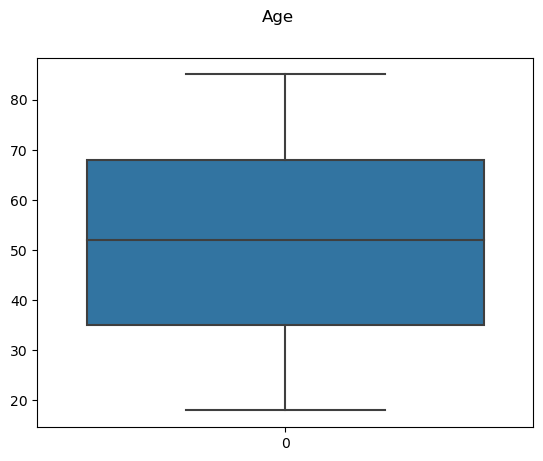

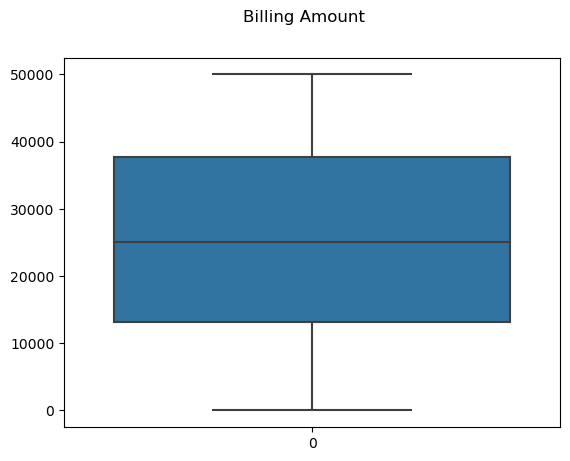

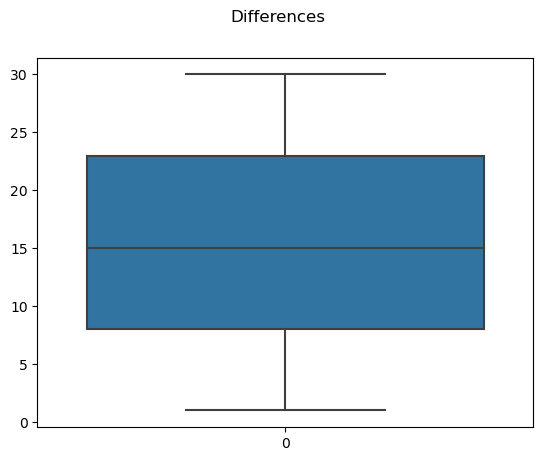

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_columns = train.select_dtypes(include='number').columns.tolist()
 
for column in numerical_columns:
    plt.suptitle(column)
    sns.boxplot(train[column])
    plt.show()



In [32]:
train['Billing Amount'] = abs(train['Billing Amount'])   
train['Billing Amount'] = train['Billing Amount'].apply(lambda x: min(x, 50000))

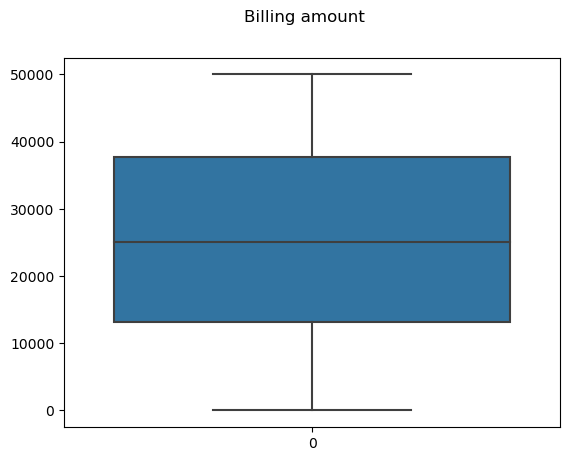

In [33]:
plt.suptitle('Billing amount')
sns.boxplot(train['Billing Amount'])
plt.show()

In [34]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

OH_Encoder = OneHotEncoder()
L_Encoder = LabelEncoder()



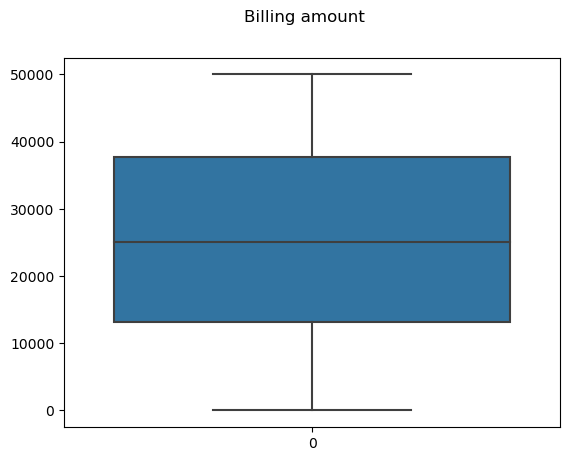

In [35]:
plt.suptitle('Billing amount')
sns.boxplot(train['Billing Amount'])
plt.show()

In [36]:
gender_encoded = {
    'Male':1,
    'Female':0
}

Admission_type_encoding = {
    'Emergency' : 3,
    'Urgent' : 2,
    'Elective':1
}

test_results = {
    'Normal' : 1,
    'Abnormal' : 0
}


train.replace(gender_encoded, inplace=True)
train.replace(Admission_type_encoding, inplace=True)
train.replace(test_results, inplace=True)

In [37]:
train.head()

,Age,Gender,Blood Type,Medical Condition,Insurance Provider,Billing Amount,Admission Type,Medication,Test Results,Differences
0,35,1,O+,Asthma,UnitedHealthcare,47304.064845,3,Lipitor,1,14
2,49,1,B-,Asthma,Medicare,23303.322092,2,Penicillin,0,1
4,41,1,AB+,Arthritis,Aetna,22522.363385,2,Aspirin,0,3
5,82,1,AB+,Hypertension,Cigna,39593.435761,2,Lipitor,0,24
6,55,0,O-,Arthritis,Blue Cross,13546.817249,1,Aspirin,1,17


In [38]:
# billing amount

In [39]:
from sklearn.preprocessing import LabelEncoder


cols = ['Blood Type', 'Medical Condition', 'Insurance Provider', 'Medication']

In [40]:
LE = LabelEncoder()

for column in cols:
    train[column] = LE.fit_transform(train[column])

In [41]:
train.head()

,Age,Gender,Blood Type,Medical Condition,Insurance Provider,Billing Amount,Admission Type,Medication,Test Results,Differences
0,35,1,6,1,4,47304.064845,3,2,1,14
2,49,1,5,1,3,23303.322092,2,4,0,1
4,41,1,2,0,0,22522.363385,2,0,0,3
5,82,1,2,4,2,39593.435761,2,2,0,24
6,55,0,7,0,1,13546.817249,1,0,1,17


In [42]:
from sklearn.preprocessing import StandardScaler

SS = StandardScaler()

cols = train.drop(['Test Results'], axis=1).columns

for col in cols:
    train[[col]] = SS.fit_transform(train[[col]])

train.head()


,Age,Gender,Blood Type,Medical Condition,Insurance Provider,Billing Amount,Admission Type,Medication,Test Results,Differences
0,-0.839804,1.007987,1.090455,-0.879951,1.448002,1.551709,1.224142,-0.012241,1,-0.182199
2,-0.124210,1.007987,0.655484,-0.879951,0.737253,-0.146643,-0.007964,1.394694,0,-1.692670
4,-0.533121,1.007987,-0.649429,-1.469712,-1.394996,-0.201906,-0.007964,-1.419177,0,-1.460290
5,1.562548,1.007987,-0.649429,0.889334,0.026503,1.006086,-0.007964,-0.012241,0,0.979702
6,0.182473,-0.992076,1.525426,-1.469712,-0.684247,-0.837038,-1.240069,-1.419177,1,0.166371


In [43]:
train.describe()

,Age,Gender,Blood Type,Medical Condition,Insurance Provider,Billing Amount,Admission Type,Medication,Test Results,Differences
count,6.034000e+03,6.034000e+03,6.034000e+03,6.034000e+03,6.034000e+03,6.034000e+03,6.034000e+03,6.034000e+03,6034.000000,6.034000e+03
mean,1.106911e-16,-7.889686e-17,7.124268e-17,-1.360088e-16,-5.534556e-17,-2.372794e-16,-7.065390e-18,1.204060e-16,0.487570,1.766348e-17
std,1.000083e+00,1.000083e+00,1.000083e+00,1.000083e+00,1.000083e+00,1.000083e+00,1.000083e+00,1.000083e+00,0.499887,1.000083e+00
min,-1.708740e+00,-9.920765e-01,-1.519371e+00,-1.469712e+00,-1.394996e+00,-1.795645e+00,-1.240069e+00,-1.419177e+00,0.000000,-1.692670e+00
25%,-8.398043e-01,-9.920765e-01,-1.084400e+00,-8.799508e-01,-6.842467e-01,-8.609963e-01,-1.240069e+00,-7.157092e-01,0.000000,-8.793398e-01
50%,2.913169e-02,-9.920765e-01,-2.144579e-01,-2.901893e-01,2.650293e-02,-2.036317e-02,-7.963558e-03,-1.224132e-02,0.000000,-6.600921e-02
75%,8.469538e-01,1.007987e+00,6.554842e-01,8.893339e-01,7.372526e-01,8.740900e-01,1.224142e+00,6.912266e-01,1.000000,8.635114e-01
max,1.715890e+00,1.007987e+00,1.525426e+00,1.479095e+00,1.448002e+00,1.742480e+00,1.224142e+00,1.394694e+00,1.000000,1.676842e+00


In [44]:
x_ = train.drop(['Test Results'], axis=1).values
y_ = train['Test Results'].values

In [45]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()


cv_scores = cross_val_score(model, x_, y_, cv=5, scoring='accuracy')  # You can specify a different scoring metric if needed
predictions = cross_val_predict(model, x_, y_, cv=5)
# Display the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV score:", cv_scores.mean())

Cross-validation scores: [0.52775476 0.51781276 0.49544325 0.53106877 0.54228856]
Mean CV score: 0.5228736186507397


In [46]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_, predictions)




array([[1658, 1434],
       [1461, 1481]], dtype=int64)

In [47]:
from sklearn.linear_model import LogisticRegression

model2 = LogisticRegression()

cv_scores = cross_val_score(model2, x_, y_, cv=5, scoring='accuracy')  # You can specify a different scoring metric if needed
predictions = cross_val_predict(model, x_, y_, cv=5)
# Display the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV score:", cv_scores.mean())

Cross-validation scores: [0.48964374 0.50869925 0.53521127 0.52029826 0.48590381]
Mean CV score: 0.5079512682376573
